<a href="https://colab.research.google.com/github/Aakriti555/Neural-Network-and-Deep-learning-Assignment-/blob/main/Practical_A6_Aakriti_Banjara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aakriti Banjara
### CE-2020
### Assignment VI

# What are CNN?

A CNN, also known as a ConvNet, is one of the most widely used deep
learning algorithms for computer vision tasks.

CNNs consists of the following three important layers:
- The convolutional layer
- The pooling layer
- The fully connected layer

CNN is used for extracting important features from the image. CNN use filter matrix:

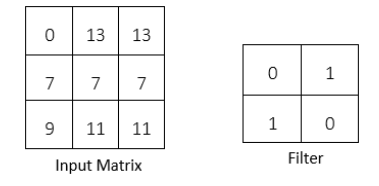

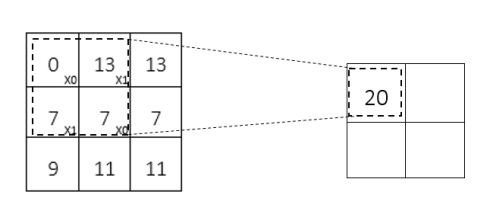

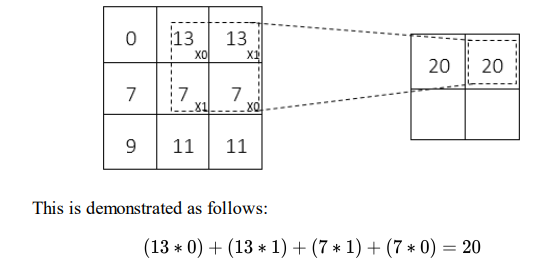

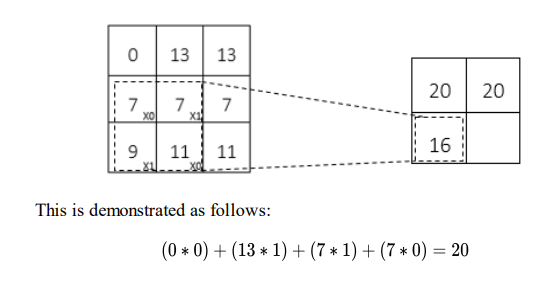

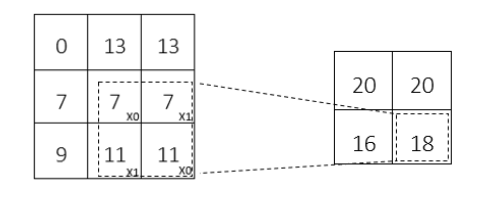

We are basically sliding the filter matrix
over the entire input matrix by one pixel, performing element-wise
multiplication and summing their results, which creates a new matrix called a
feature map or activation map. This is called the convolution operation.

The following diagram shows the actual image (the input image) and the
convolved image (the feature map). We can see that our filter has detected the
edges from the actual image as a feature:

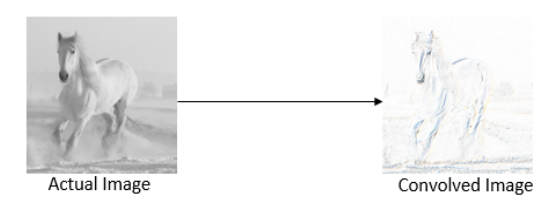


we can use multiple filters for extracting different features from the
image, and produce multiple feature maps. So, the depth of the feature map
will be the number of filters. If we use seven filters to extract different
features from the image, then the depth of our feature map will be seven:






### Strides

- The number of pixels we slide over the input matrix by the filter matrix is
called a stride. stride is
set to a small number

### Padding
There exists a situation where,
when we move our filter matrix by two pixels, it reaches the border and the
filter matrix does not fit the input matrix.

Padding with zeros on the input matrix is called same padding or
zero padding:
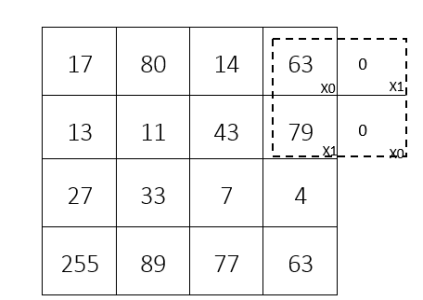

### Pooling Layers

It is used to reduce the dimensions of feature maps, we
perform a pooling operation.

A pooling operation is also
called a downsampling or subsampling operation, and it makes the CNN
translation invariant. Thus, the pooling layer reduces spatial dimensions by
keeping only the important features.

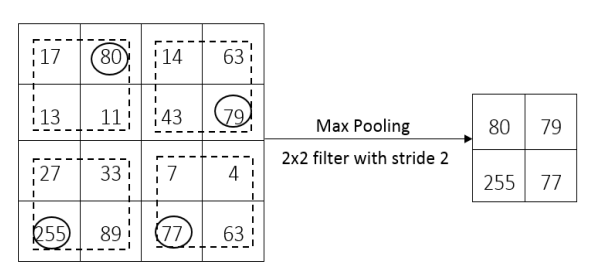

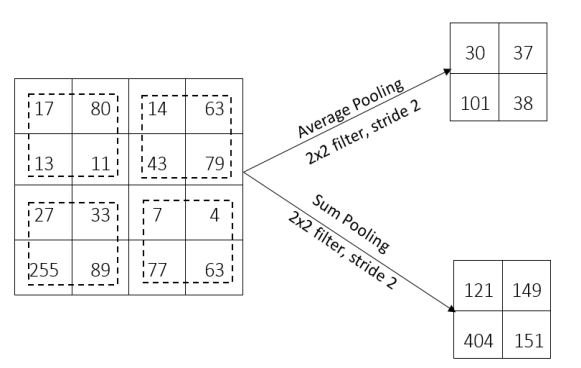

### Fully Connected Layers

The feedforward network takes this flattened feature
map as an input, applies an activation function, such as sigmoid, and returns
the output, stating whether the image contains a horse or not; this is called a
fully connected layer and is shown in the following diagram:

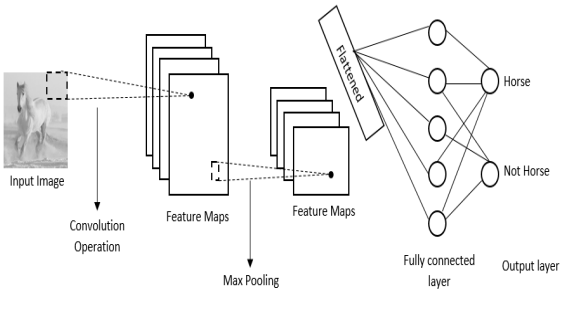


# The architecture of CNNs

The architecture of a CNN is shown in the following diagram:

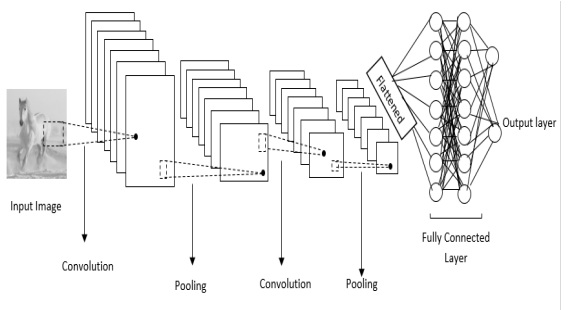



# The Math behind CNNs

## Forward Propagation

Let's consider an input matrix, X, and filter, W, with
values shown as follows:

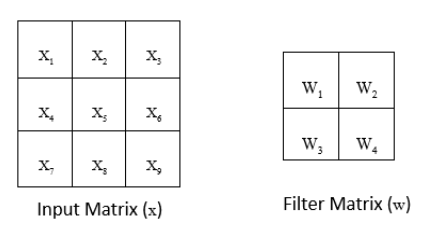

we take the filter, slide it over the input
matrix, perform a convolution operation, and produce the output matrix (the
feature map) just as we learned in the previous section:

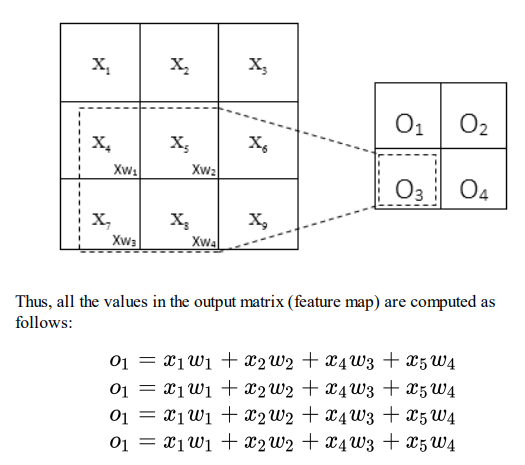

 Let's say
we have an input image, X, with a width of W and a height of H, and the filter
of size P x Q, then the convolution operation can be represented as follows:

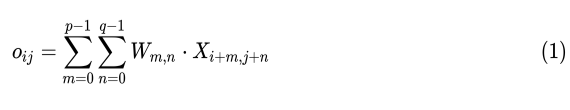

Once the convolution operation is performed, we feed the result output , to a feedforward network Y and predict the output Y_t:

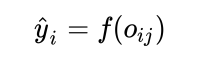

## Backward propagation  

we have predicted the output, we compute the loss, L. We use the mean
squared error as the loss function, that is, the mean of the squared difference
between the actual output, $ Y_{t} $ , and the predicted output, $ Y_{t} cap $ , which is given as
follows:

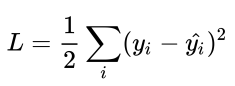

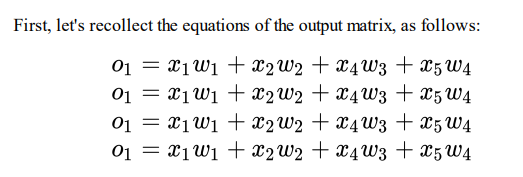

 we calculate the partial derivatives of the loss with
respect to w1 as follows:

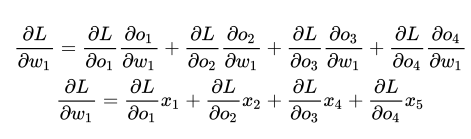

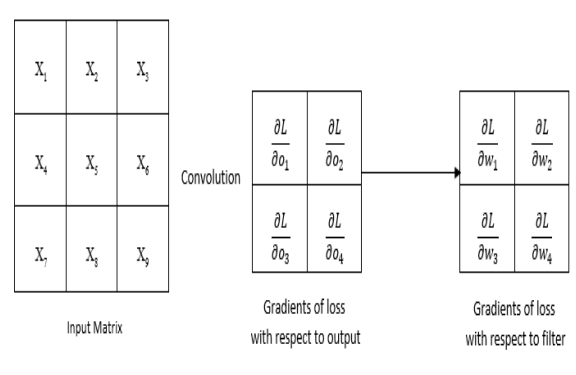

we understand that computing the gradients of loss with respect to the
filter (that is, weights) is just the convolution operation between the input
matrix and the gradient of loss with respect to the output as a filter matrix.

We also calculate the gradientd of loss with respect to an input for calculating the gradients of the filters present in the previous layers.

Our input matrix consists of nine values, from to , so we need to
calculate the gradients of loss with respect to all these nine values.

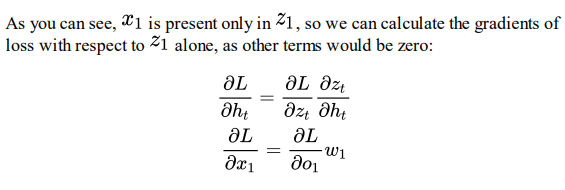

we calculate the gradients of loss with respect to all the
inputs as follows:

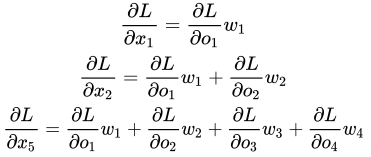

 Instead
of using the filter matrix directly, we rotate them 180 degrees and, also,
instead of performing convolution, we perform full convolution.

The following shows what the kernel rotated by 180 degrees looks like:
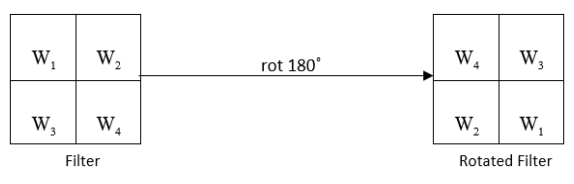

The shaded matrix represents the filter matrix and the unshaded one represents the input matrix:

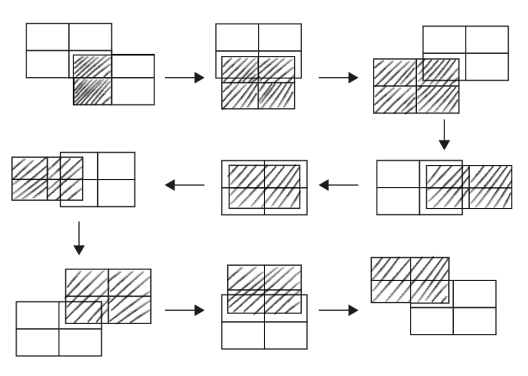


 we can say that the gradient of loss with respect to the input matrix can be
calculated using a full convolution operation between a filter rotated by 180
degrees as the input matrix and the gradient of the loss with respect to the
output as a filter matrix:

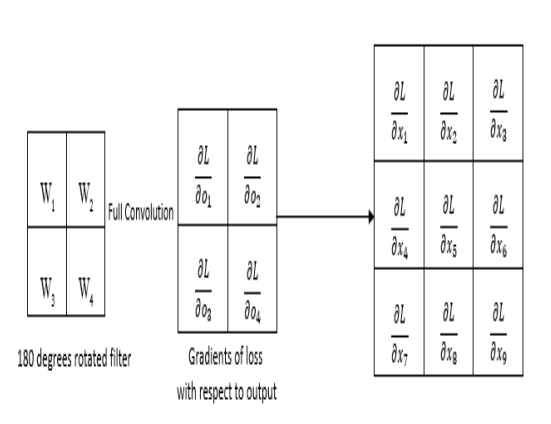

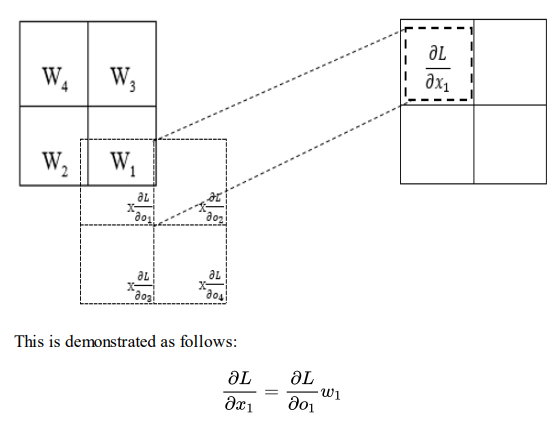

Thus, we understand that computing the gradients of loss with respect to the
input is just the full convolution operation. So, we can say that
backpropagation in CNN is just another convolution operation

# Implementing a CNN in TensorFlow

We will use the
 MNIST handwritten digits dataset and understand how a CNN recognizes
 handwritten digits, and we will also visualize how the convolutional layers
 extract important features from the image.

  First, let's load the required libraries:


In [ ]:
import tensorflow.compat.v1 as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
import numpy as np

tf.logging.set_verbosity(tf.logging.ERROR)
import matplotlib.pyplot as plt
%matplotlib inline
tf.disable_v2_behavior()

## Defining helper functions
Now we define the functions for initializing weights and bias, and for
 performing the convolution and pooling operations.

In [ ]:
def initialize_weights(shape):
  return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

In [ ]:
# Initialize the bias with a constant value of, say, 0.1:
def initialize_bias(shape):
  return tf.Variable(tf.constant(0.1, shape=shape))

In [ ]:
def convolution(x, W):
 return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

We define a function called max_pooling, using tf.nn.max_pool() to perform the
 pooling operation. We perform max pooling with a stride of 2 and the same
 padding and ksize implies our pooling window shape:

In [ ]:
def max_pooling(x):
 return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [ ]:
#  Define the placeholders for the input and output.
# The placeholder for the input image is defined as follows:
X_ = tf.placeholder(tf.float32, [None, 784])
#  The placeholder for a reshaped input image is defined as follows:
X = tf.reshape(X_, [-1, 28, 28, 1])
#  The placeholder for the output label is defined as follows:
y = tf.placeholder(tf.float32, [None, 10])

# Defining the convolutional network

 Our network architecture consists of two convolutional layers. Each
 convolutional layer is followed by one pooling layer, and we use a fully
 connected layer that is followed by an output layer; that is,

 conv1->pooling >conv2->pooling2->fully connected layer-> output layer.

First, we define the first convolutional layer and pooling layer.
 The weights are actually the filters in the convolutional layers. So, the weight
 matrix will be initialized as

 [ filter_shape[0], filter_shape[1],  number_of_input_channel, filter_size ].

 We use a 5 x 5 filter. Since we use grayscale images, the number of input
 channels will be 1 and we set the filter size as 32. So, the weight matrix of the
 first convolution layer will be [5,5,1,32]

In [ ]:
W1 = initialize_weights([5,5,1,32])

In [ ]:
# The shape of the bias is just the filter size, which is 32:
b1 = initialize_bias([32])
# Perform the first convolution operation with ReLU activations followed by max pooling:
conv1 = tf.nn.relu(convolution(X, W1) + b1)
pool1 = max_pooling(conv1)

As the second convolutional layer takes the input from the first convolutional
 layer, which has 32-channel output, the number of input channel, to the
 second convolutional layer becomes 32 and we use the **5 x 5 filter** with a
 filter size of 64. Thus, the weight matrix for the second convolutional layer
 becomes **[5,5,32,64]**:


In [ ]:
W2 = initialize_weights([5,5,32,64])
# The shape of the bias is just the filter size, which is 64
b2 = initialize_bias([64])
#  Perform the second convolution operation with ReLU activations, followed by max pooling:
conv2 = tf.nn.relu(convolution(pool1, W2) + b2)
pool2 = max_pooling(conv2)
# Flatten the result of the second pooling layer:
flattened = tf.reshape(pool2, [-1, 7*7*64])

Now we define the weights and bias for the fully connected layer. We know
 that we set the shape of the weight matrix as [number of neurons in the current
 layer, number of neurons layer in the next layer]. This is because the shape of the
 input image becomes **7x7x64** after flattening and we use 1024 neurons in the
 hidden layer. The shape of the weights becomes **[7x7x64, 1024]**:

In [ ]:
W_fc = initialize_weights([7*7*64, 1024])
b_fc = initialize_bias([1024])

In [ ]:
# Here is a fully connected layer with ReLU activations:
fc_output = tf.nn.relu(tf.matmul(flattened, W_fc) + b_fc)

 Define the output layer. We have 1024 neurons in the current layer, and since
 we need to predict 10 classes, we have 10 neurons in the next layer, thus the
 shape of the weight matrix becomes **[1024 x 10]:**

In [ ]:
W_out = initialize_weights([1024, 10])
b_out = initialize_bias([10])
# Compute the output with softmax activations:
y_hat = tf.nn.softmax(tf.matmul(fc_output, W_out) + b_out)

## Computing loss
Compute the loss using cross entropy. We know that the cross-entropy loss is given as follows:
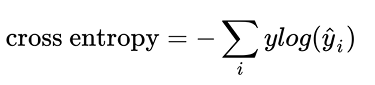

 Here,  is the actual label and  is the predicted label. Thus, the cross
entropy loss is implemented as follows:

In [ ]:
cross_entropy = -tf.reduce_sum(y*tf.log(y_hat))
#  Minimize the loss using the Adam optimizer:
optimizer = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#  Calculate the accuracy:
predicted_digit = tf.argmax(y_hat, 1)
actual_digit = tf.argmax(y, 1)
correct_pred = tf.equal(predicted_digit,actual_digit)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

## Starting the training


In [ ]:
#  Start a TensorFlow Session and initialize all the variables:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Train the model for 1000 epochs. Print the results for every 100 epochs:

In [ ]:
# Load the MNIST data set

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0  # Flatten and normalize
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encode labels
y_test = tf.keras.utils.to_categorical(y_test, 10)


# Create TensorFlow Dataset and Iterator
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1024).batch(100)
iterator = tf.compat.v1.data.make_initializable_iterator(train_dataset)
next_batch = iterator.get_next()

# Training loop
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for epoch in range(1000):
        # Initialize the dataset iterator
        sess.run(iterator.initializer)

        while True:
            try:
                X_batch, y_batch = sess.run(next_batch)
                # Train the network
                loss, acc, _ = sess.run([cross_entropy, accuracy, optimizer], feed_dict={X_: X_batch, y: y_batch})
            except tf.errors.OutOfRangeError:
                break

        # Print the loss and accuracy on every 100th epoch
        if epoch % 100 == 0:
            print(f'Epoch: {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.4f}')

## Visualizing extracted features
 Now that we have trained our CNN model, we can see what features our
 CNN has extracted to recognize the image. As we learned, each convolutional
 layer extracts important features from the image. We will see what features
 our first convolutional layer has extracted to recognize the handwritten digits

In [ ]:
#First, let's select one image from the training set, say, digit 1:
x_train[0].shape

(784,)

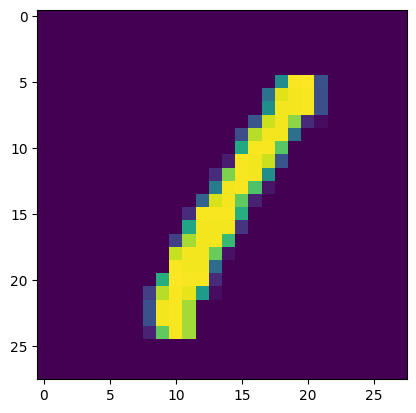

In [ ]:
plt.imshow(x_train[3].reshape([28, 28]))

In [ ]:
# Starting tensorflow session

sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())
image = x_train[3].reshape([-1 , 784])
feature_map = sess.run([conv1], feed_dict={X_: image})[0]

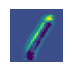

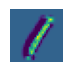

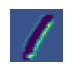

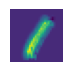

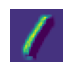

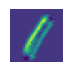

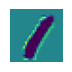

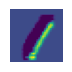

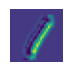

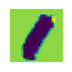

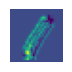

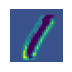

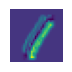

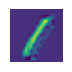

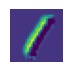

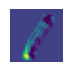

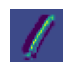

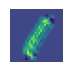

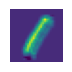

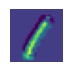

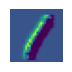

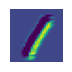

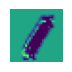

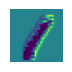

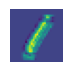

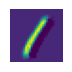

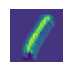

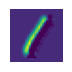

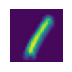

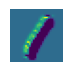

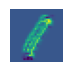

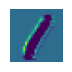

In [ ]:
for i in range(32):
  feature = feature_map[:,:,:,i].reshape([28, 28])
  plt.subplot(4,8, i + 1)
  plt.imshow(feature)
  plt.axis('off')
  plt.show()

# Different CNN architectures

## LeNet architecture
It only consists of seven layers. Out of these seven layers, there are three convolutional
layers, two pooling layers, one fully connected layer, and one output layer. It
uses a 5 x 5 convolution with a stride of 1, and uses average pooling.

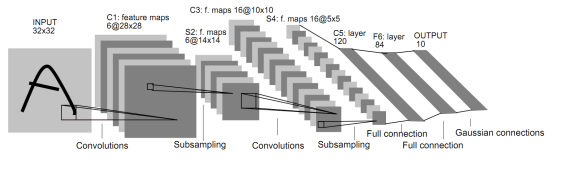

## Understanding AlexNet

Reduces the error rate from 26% to 15.3%
It consists of five convolutional layers
and three fully connected layers, as shown in the following diagram. It uses
the ReLU activation function instead of the tanh function, and ReLU is applied
after every layer. It uses dropout to handle overfitting, and dropout is
performed before the first and second fully connected layers. It uses data
augmentation techniques, such as image translation, and is trained using batch
stochastic gradient descent.

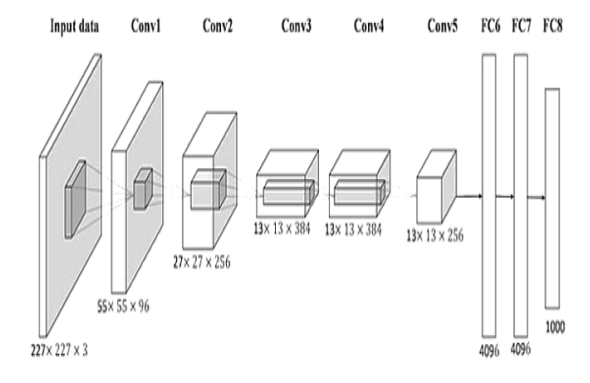

## Architecture of VGGNet
VGGNet is one of the most popularly used CNN architectures. It is used for object-detection tasks. r. It uses 3 x 3 convolution
and 2 x 2 pooling throughout the network. It is referred to as VGG-n, where n
corresponds to a number of layers, excluding the pooling and softmax layer.
The following figure shows the architecture of the VGG-16 network:

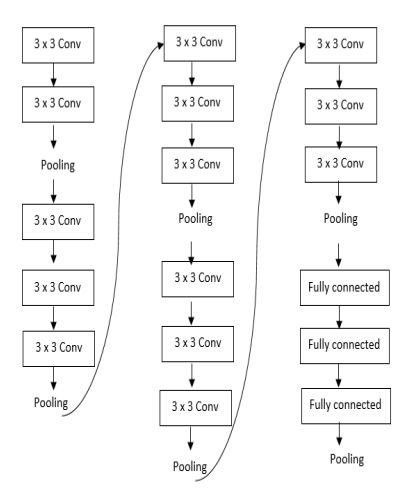

## GoogleNet

**Inception v1**

We can use a filter of a large size when the object size is large, but a large
filter size is not suitable when we have to detect an object that is in a small
corner of an image. Since we use a fixed receptive field that is a fixed filter
size, it is difficult to recognize objects in the images whose position varies
greatly. To overcome this, instead of using a single filter of the same size, the
inception network uses multiple filters of varying sizes on the same input.

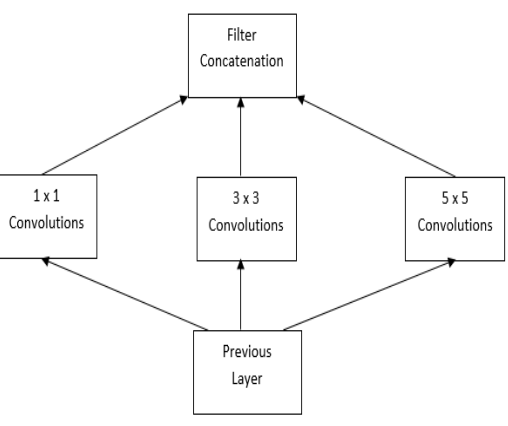

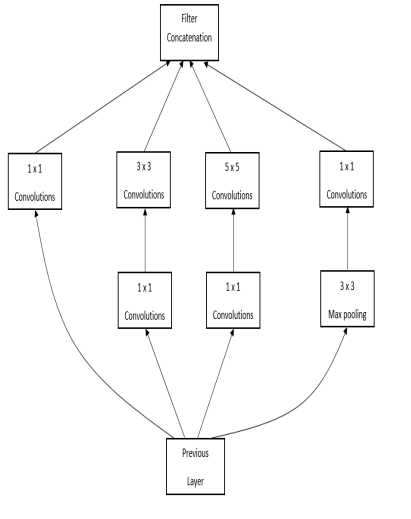

** Inception v2 and v3 **

we are basically expanding our
network in a deeper fashion, which will lead us to lose information. So,
instead of making it deeper, we make our network wider, shown as follows:

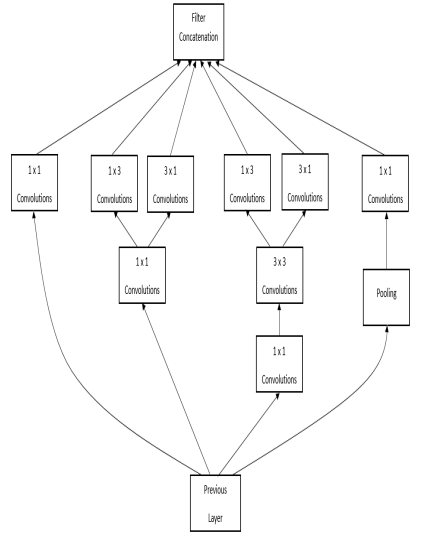


# Capsule Networks

Capsule
network, which consists of capsules instead of neurons. Like a CNN, the
Capsule network checks for the presence of certain features to classify the
image, but apart from detecting the features, it will also check the spatial
relationship between them. If the image does not follow this relationship, then the
Capsule network will not classify it as a face:

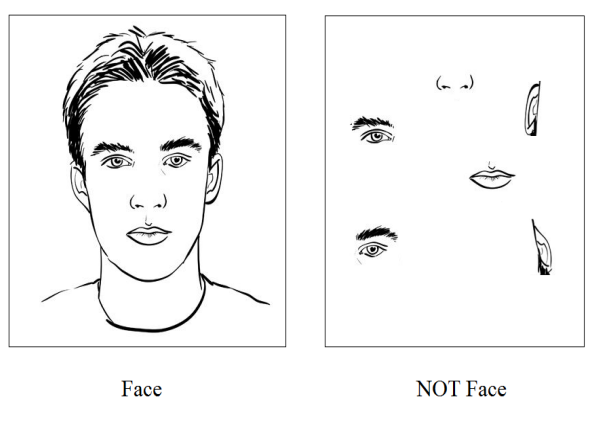

A capsule is a group of neurons that learn to detect a particular feature in the
image; say, eyes. Unlike neurons, which return a scalar, capsules return a
vector. The length of the vector tells us whether a particular feature exists in a
given location, and the elements of the vector represent the properties of the
features, such as, position, angle, and so on.

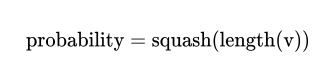

 capsules in the higher layers take
input from the capsules in the lower layers. In order for the capsules in the
higher layers to detect a face, they not only check for the presence of features
such as a nose and eyes, but also check their spatial relationships.



Capsules
from the lower layer send their outputs to capsules in the higher layer. $ x_{t} $ will
be the activations of the capsules from the lower layer, l . $ z_{j} $ will be the
activations of the capsules from the higher layer, l+1.

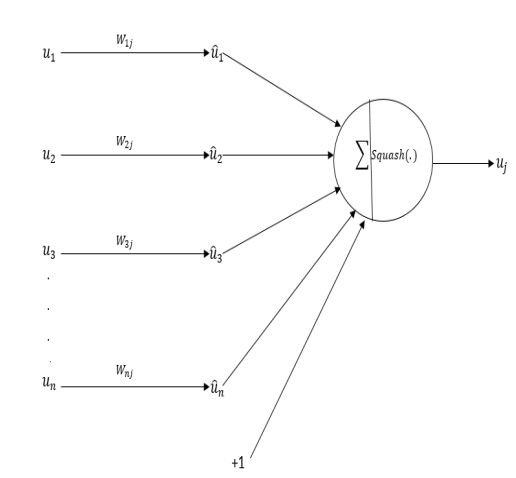

## Computing prediction vectors

we multiply these vectors by the weight matrix and
compute a prediction vector:
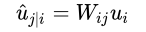

The weights matrix represents the spatial and other relationship between
low-level features and high-level features.

So, by multiplying the inputs by weights, we can predict the position of the
face:

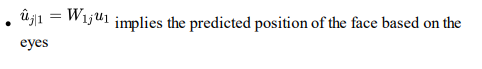
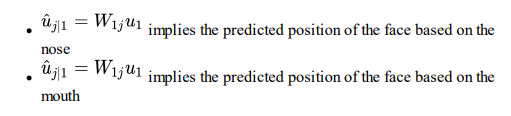
When all the predicted positions of the face are the same, that is, in
agreement with each other, then we can say that the image contains a face. We
learn these weights using backward propagation.



## Coupling coefficients
The coupling coefficient helps the capsule in the lower layer to
understand which capsule in the higher layer it has to send its output to.

 The
coupling coefficients are learned in the forward propagation itself, and they are learned using an algorithm called dynamic routing.
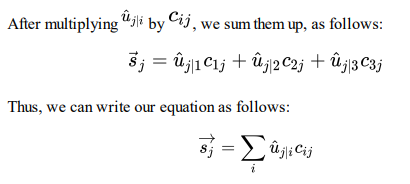

## Squashing function

Squashing function preserve the direction of the vectors. we use an activation function called the squash function. It is given as follows:

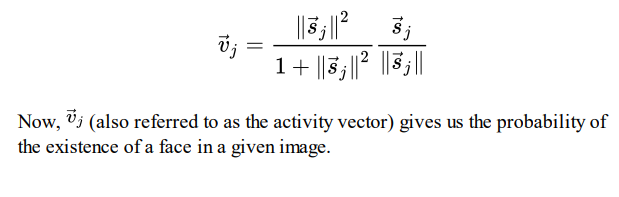



## Dynamic routing algorithm
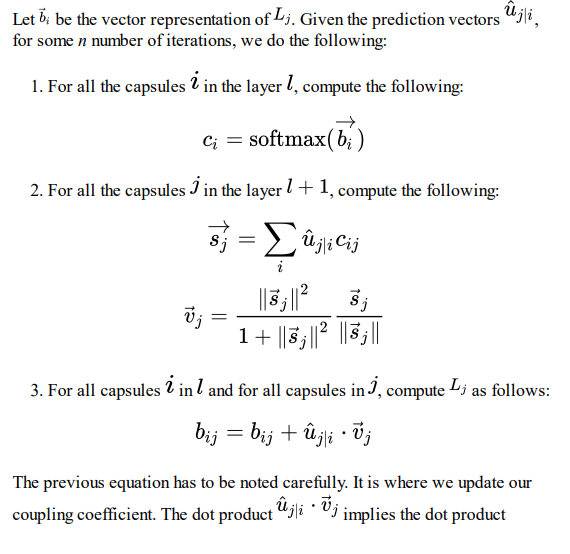

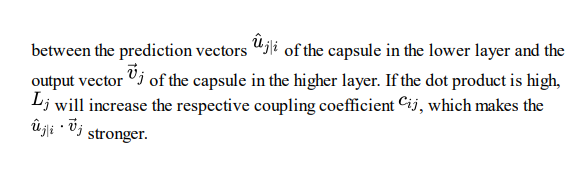



## Architecture of the Capsule network

The architecture of a Capsule network is shown here:

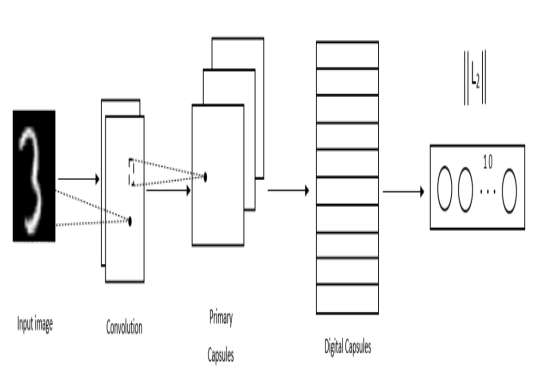

In the preceding diagram, we can observe the following:
- 1. First, we take the input image and feed it to a standard convolution layer,
and we call the result convolutional inputs.

- 2. Then, we feed the convolutional inputs to the primary capsules layer and
get the primary capsules.
- 3. Next, we compute digit capsules with primary capsules as input using the
dynamic-routing algorithm.
- 4. The digit capsules consist of 10 rows, and each of the rows represents
the probability of the predicted digit. That is, row 1 represents the
probability of the input digit to be 0, row 2 represents the probability of
the digit 1, and so on.
- 5. Since the input image is digit 3 in the preceding image, row 4, which
represents the probability of digit 3, will be high in the digit capsules.



## Margin loss
We learned that the capsule returns a vector and the length of a vector
represents the probability of the existence of the features.

To detect multiple
digits in a given image, we use margin loss,L0 , for each digit capsule, d , as
follows:

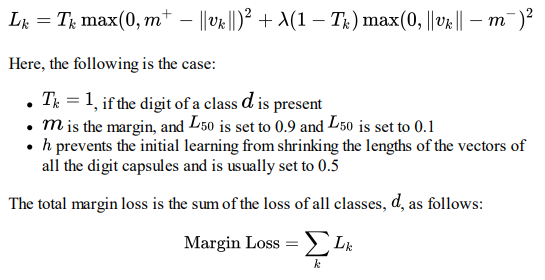

## Reconstruction loss

We use a three-layer
network called a decoder network, which tries to reconstruct the original
image from the digit capsules:

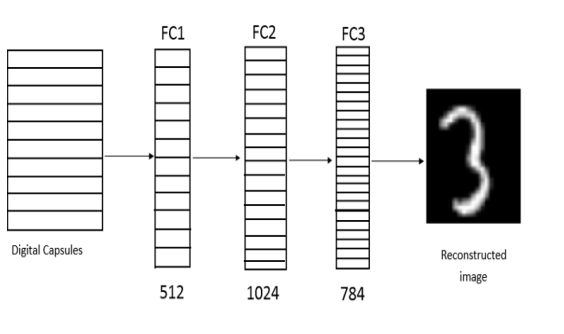

Reconstruction loss is given as the squared difference between the
reconstructed and original image, as follows:

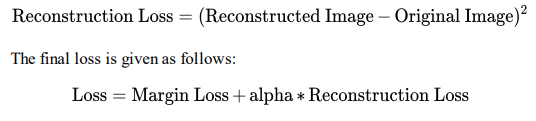

Here, alpha is a regularization term, because we don't want the reconstruction
loss to have more priority than the margin loss. So, alpha is multiplied by the
reconstruction loss to scale down its importance, and is usually set to 0.0005


# Building Capsule Networks in TensorFlow
Now we will learn how to implement Capsule networks in TensorFlow. We
will use our favorite MNIST dataset tolearn how a Capsule network
recognizes the handwritten image.

In [ ]:
# Import the required libraries:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
# import tensorflow.compat.v1 as tf
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# tf.logging.set_verbosity(tf.logging.ERROR)

In [ ]:
batch_size = 50
epsilon = 1e-9

In [ ]:
#The squash function can be defined as follows:
def squash(sj):
    sj_norm = tf.reduce_sum(tf.square(sj), -2, keepdims=True) # Changed keep_dims to keepdims
    scalar_factor = sj_norm / (1 + sj_norm) / tf.sqrt(sj_norm + epsilon)
    vj = scalar_factor * sj
    return vj

## Defining a dynamic routing
 Now we will look at how the dynamic routing algorithm is implemented. We
 use variable names of the same notations that we learned in the dynamic
 routing algorithm, so that we can easily follow the steps. We will look at
 each line in our function step by step.

First, define the function called dynamic_routing, which takes the previous
 capsules, ui, coupling coefficients, bij, and number of routing iterations,
 num_routing as inputs as follows:

In [ ]:
def dynamic_routing(ui, bij, num_routing=10):
    # Initialize the wij weights by drawing from a random normal distribution, and initialize biases with a constant value:
    # Use tf.compat.v1.get_variable for compatibility with TensorFlow 2.x
    wij = tf.compat.v1.get_variable('Weight', shape=(1, 1152, 160, 8, 1), dtype=tf.float32,
                                   initializer=tf.random_normal_initializer(0.01))
    biases = tf.compat.v1.get_variable('bias', shape=(1, 1, 10, 16, 1))  # Use tf.compat.v1.get_variable here as well
    # Change 'keep_dims' to 'keepdims' to fix the error
    u_hat = tf.reduce_sum(wij * ui, axis=3, keepdims=True)
    u_hat = tf.reshape(u_hat, shape=[-1, 1152, 10, 16, 1])
    u_hat_stopped = tf.stop_gradient(u_hat, name='stop_gradient')
    for r in range(num_routing):
        with tf.compat.v1.variable_scope('iter_' + str(r)):  # Use tf.compat.v1.variable_scope

            #step 1
            cij = tf.nn.softmax(bij, axis=2) #change dim to axis

            #step 2
            if r == num_routing - 1:
                sj = tf.multiply(cij, u_hat)
                # Change 'keep_dims' to 'keepdims' here as well
                sj = tf.reduce_sum(sj, axis=1, keepdims=True) + biases
                vj = squash(sj)
            elif r < num_routing - 1:
                sj = tf.multiply(cij, u_hat_stopped)
                # Change 'keep_dims' to 'keepdims' here as well
                sj = tf.reduce_sum(sj, axis=1, keepdims=True) + biases
                vj = squash(sj)
                vj_tiled = tf.tile(vj, [1, 1152, 1, 1, 1])
                # Change 'keep_dims' to 'keepdims' here as well
                coupling_coeff = tf.reduce_sum(u_hat_stopped * vj_tiled, axis=3, keepdims=True)
                #step 3
                bij += coupling_coeff
    return vj

## Computing primary and digit capsules
Now we will compute the primary capsules, which extract the basic features,
 and the digit capsules, which recognizes the digits

In [ ]:
graph = tf.Graph()

with graph.as_default() as g:

    #placeholders for the input and output
    x = tf.compat.v1.placeholder(tf.float32, [batch_size, 784])
    y = tf.compat.v1.placeholder(tf.float32, [batch_size,10])

    #reshape the input x
    x_image = tf.reshape(x, [-1,28,28,1])

    #perform the convolutional operation and get the convolutional input,
    with tf.name_scope('convolutional_input'):
      input_data = tf.keras.layers.Conv2D(filters=256, kernel_size=9, padding='valid', activation=None)(x_image)


    #compute the primary capsules which extract the basic features such as edges.
    #first, compute the capsules using convolution operation:
    capsules = []

    for i in range(8):

         with tf.name_scope('capsules_' + str(i)):

            #convolution operation
            output = tf.keras.layers.Conv2D(filters=32, kernel_size=9,
                                              strides=2, padding='valid')(input_data)

            #reshape the output
            output = tf.reshape(output, [batch_size, -1, 1, 1])

            #store the output which is capsule in the capsules list
            capsules.append(output)

    #concatenate all the capsules and form the primary capsule
    primary_capsule = tf.concat(capsules, axis=2)

    #squash the primary capsule and get the probability i.e apply squash function and get the probability
    primary_capsule = squash(primary_capsule)


    #compute digit capsules using dynamic routing
    with tf.name_scope('dynamic_routing'):

        #reshape the primary capsule
        outputs = tf.reshape(primary_capsule, shape=(batch_size, -1, 1, primary_capsule.shape[-2].value, 1))

        #initialize bij with 0s
        bij = tf.constant(np.zeros([1, primary_capsule.shape[1].value, 10, 1, 1], dtype=np.float32))

        #compute the digit capsules using dynamic routing algorithm which takes
        #the reshaped primary capsules and bij as inputs and returns the activity vector
        digit_capsules = dynamic_routing(outputs, bij)

    digit_capsules = tf.squeeze(digit_capsules, axis=1)

## Masking the digit capsule
The digit capsules contain the activity vector for all the digits. But the
 decoder wants to reconstruct only the given input digit (the input image). So,
 we mask out the activity vector of all the digits, except for the correct digit.
 Then we use this masked digit capsule to reconstruct the given input image:

In [ ]:
with graph.as_default() as g:
 with tf.compat.v1.variable_scope('Masking'):
 #select the activity vector of given input image using the actual label y and mask out others
  masked_v = tf.multiply(tf.squeeze(digit_capsules), tf.reshape(y, (-1, 10,
1)))

## Defining the decoder
Define the decoder network for reconstructing the image. It consists of three
 fully connected networks, as follows:

In [ ]:
graph = tf.Graph()

with graph.as_default() as g:

    # Placeholders for input and output
    x = tf.compat.v1.placeholder(tf.float32, [batch_size, 784])
    y = tf.compat.v1.placeholder(tf.float32, [batch_size, 10])

    # Reshape the input x
    x_image = tf.reshape(x, [-1, 28, 28, 1])

    # Convolutional input
    with tf.name_scope('convolutional_input'):
        input_data = tf.keras.layers.Conv2D(filters=256, kernel_size=9, padding='valid', activation=None)(x_image)

    # Compute primary capsules
    capsules = []
    for i in range(8):
        with tf.name_scope('capsules_' + str(i)):
            output = tf.keras.layers.Conv2D(filters=32, kernel_size=9, strides=2, padding='valid')(input_data)
            output = tf.reshape(output, [batch_size, -1, 1, 1])
            capsules.append(output)

    # Concatenate primary capsules
    primary_capsule = tf.concat(capsules, axis=2)

    # Squash the primary capsule
    primary_capsule = squash(primary_capsule)

    # Compute digit capsules using dynamic routing
    with tf.name_scope('dynamic_routing'):
        outputs = tf.reshape(primary_capsule, shape=(batch_size, -1, 1, primary_capsule.shape[-2].value, 1))
        bij = tf.constant(np.zeros([1, primary_capsule.shape[1].value, 10, 1, 1], dtype=np.float32))
        digit_capsules = dynamic_routing(outputs, bij)

    digit_capsules = tf.squeeze(digit_capsules, axis=1)

    # Masking
    with tf.compat.v1.variable_scope('Masking'):
        masked_v = tf.multiply(tf.squeeze(digit_capsules), tf.reshape(y, (-1, 10, 1)))

    # Decoder – Now inside the main graph context
    with tf.name_scope('Decoder'):
        v_j = tf.reshape(masked_v, shape=(batch_size, -1))
        fc1 = tf.keras.layers.Dense(units=512, activation=None)(v_j)
        fc2 = tf.keras.layers.Dense(units=1024, activation=None)(fc1)
        reconstructed_image = tf.keras.layers.Dense(units=784, activation='sigmoid')(fc2)

## Computing the accuracy of the model

In [ ]:
with graph.as_default() as g:
  with tf.compat.v1.variable_scope('accuracy'):

        # Compute the length of each activity vector in the digit capsule
        # Changed 'keep_dims' to 'keepdims'
        v_length = tf.sqrt(tf.reduce_sum(tf.square(digit_capsules), axis=2, keepdims=True) + epsilon)

        # Apply softmax to the length and get the probabilities
        # Changed 'dim' to 'axis' for compatibility with older TensorFlow versions
        softmax_v = tf.nn.softmax(v_length, axis=1)

        # Select the index which got the highest probability this will give us the predicted digit
        # Using tf.cast instead of tf.to_int32
        argmax_idx = tf.cast(tf.argmax(softmax_v, axis=1), tf.int32)
        predicted_digit = tf.reshape(argmax_idx, shape=(batch_size, ))

        # Compute the accuracy
        # Using tf.cast instead of tf.to_int32
        actual_digit = tf.cast(tf.argmax(y, axis=1), tf.int32)

        correct_pred = tf.equal(predicted_digit,actual_digit)
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

## Calculating loss
As we know, we compute two types of loss—margin loss and reconstruction
 loss.
## Margin loss
We know that margin loss is given as follows:
$$ L_{k}=T_{k} \max \left(0, m^{+}-\left\|v_{k}\right\|\right)^{2}+\lambda\left(1-T_{k}\right) \max \left(0,\left\|v_{k}\right\|-m^{-}\right)^{2} \tag{2} $$

Compute the maximum value in the left and maximum value in the right:


In [ ]:
lambda_ = 0.5
alpha = 0.0005

with graph.as_default() as g:

    #margin loss
    max_left = tf.square(tf.maximum(0.,0.9 - v_length))
    max_right = tf.square(tf.maximum(0., v_length - 0.1))

    T_k = y

    #compute margin loss L_k for class k as given in (2)
    L_k = T_k * max_left + lambda_ * (1 - T_k) * max_right

    #compute total margin as given in refer equation (3)
    margin_loss = tf.reduce_mean(tf.reduce_sum(L_k, axis=1))

    #reshape and get the original image
    original_image = tf.reshape(x, shape=(batch_size, -1))

    #compute reconstruction loss as shown in (4)
    squared = tf.square(reconstructed_image - original_image)
    reconstruction_loss = tf.reduce_mean(squared)

    #compute total loss which is the weighted sum of margin and reconstructed loss as shown in (5)
    total_loss = margin_loss + alpha * reconstruction_loss

## Training the Capsule network
 Set the number of epochs and number of steps:


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

num_epochs = 100
batch_size = 50  # Assuming batch_size was not previously defined
# Calculate the number of steps per epoch using x_train
num_steps = int(len(x_train) / batch_size)

with tf.compat.v1.Session(graph=graph) as sess:

    # Assuming 'total_loss' is your loss tensor
    optimizer = tf.compat.v1.train.AdamOptimizer().minimize(total_loss)

    # Initialize all variables, including the optimizer's variables
    init_op = tf.compat.v1.global_variables_initializer()
    sess.run(init_op)


    for epoch in range(num_epochs):
        for iteration in range(num_steps):
            # Get a batch of data and labels using slicing
            batch_data = x_train[iteration * batch_size:(iteration + 1) * batch_size]
            batch_labels = y_train[iteration * batch_size:(iteration + 1) * batch_size]

            # Reshape and normalize the data
            batch_data = batch_data.reshape(batch_size, -1) / 255.0

            # One-hot encode the labels
            batch_labels = tf.keras.utils.to_categorical(batch_labels, 10)

            feed_dict = {x: batch_data, y: batch_labels}

            # Run the optimizer and fetch the loss and accuracy
            _, loss, acc = sess.run([optimizer, total_loss, accuracy], feed_dict=feed_dict)

            if iteration % 10 == 0:
                print('Epoch: {}, iteration:{}, Loss:{} Accuracy: {}'.format(epoch, iteration, loss, acc))

Epoch: 0, iteration:0, Loss:0.5720432996749878 Accuracy: 0.14000000059604645
Epoch: 0, iteration:10, Loss:0.6675268411636353 Accuracy: 0.11999999731779099
Epoch: 0, iteration:20, Loss:0.5614831447601318 Accuracy: 0.05999999865889549
Epoch: 0, iteration:30, Loss:0.6856943368911743 Accuracy: 0.07999999821186066
Epoch: 0, iteration:40, Loss:0.542608916759491 Accuracy: 0.019999999552965164
Epoch: 0, iteration:50, Loss:0.5314977765083313 Accuracy: 0.07999999821186066
Epoch: 0, iteration:60, Loss:0.5304129719734192 Accuracy: 0.11999999731779099
Epoch: 0, iteration:70, Loss:0.5286303162574768 Accuracy: 0.05999999865889549
Epoch: 0, iteration:80, Loss:0.5267763733863831 Accuracy: 0.07999999821186066
Epoch: 0, iteration:90, Loss:0.5297726988792419 Accuracy: 0.07999999821186066
Epoch: 0, iteration:100, Loss:0.5247778296470642 Accuracy: 0.07999999821186066
Epoch: 0, iteration:110, Loss:0.5264994502067566 Accuracy: 0.14000000059604645
Epoch: 0, iteration:120, Loss:0.5265910625457764 Accuracy: 0.10

Thus, we have learned how Capsule networks work step by step, and how to
 build a Capsule network in TensorFlow.


# Summary
 We started off the chapter by understanding CNNs. We learned about the
 different layers of a CNN, such as convolution and pooling; where the
 important features from the image will be extracted and are fed to the fully
 collected layer; and where the extracted feature will be classified. We also
 visualized the features extracted from the convolutional layer using
 TensorFlow by classifying handwritten digits.
 Later, we learned about several architectures of CNN, including LeNet,
 AlexNet, VGGNet, and GoogleNet. At the end of the chapter, we studied
 Capsule networks, which overcome the shortcomings of a convolutional
 network. We learned that Capsule networks use a dynamic routing algorithm
 for classifying the image.
 In the next chapter, we will study the various algorithms used for learning
 text representations.